In [52]:
import Preprocessing as prp
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
import tensorflow
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt

In [53]:
df = prp.ReadTrainData('train.csv')

In [54]:
X = df.drop(['Price', 'price_log_transform', 'index'], axis=1)
y = df['Price']

In [55]:
X_train,X_test,y_train,y_test  = prp.train_test_split(X, y, train_size=0.8, random_state=10)

model = XGBRegressor()

model.fit(X_train, prp.np.log(y_train))


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [56]:
model_dl_small= keras.Sequential()

model_dl_small.add(layers.Dense(16,input_dim=X_train.shape[1],activation='relu'))

model_dl_small.add(layers.Dense(8,activation='relu'))

model_dl_small.add(layers.Dense(4,activation='relu'))

model_dl_small.add(layers.Dense(1,activation='linear'))

model_dl_small.compile(loss='mean_squared_error',optimizer='adam')

model_dl_small.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16)                320       
                                                                 
 dense_5 (Dense)             (None, 8)                 136       
                                                                 
 dense_6 (Dense)             (None, 4)                 36        
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 497
Trainable params: 497
Non-trainable params: 0
_________________________________________________________________


In [57]:
model_dl_small.fit(X_train,prp.np.log(y_train),verbose=0,validation_data=(X_test,prp.np.log(y_test)),epochs=20,batch_size=10)


In [58]:
X_train.shape

(15389, 19)

In [59]:
y_train.shape

(15389,)

In [60]:
history_df = prp.p.DataFrame(model_dl_small.history.history)


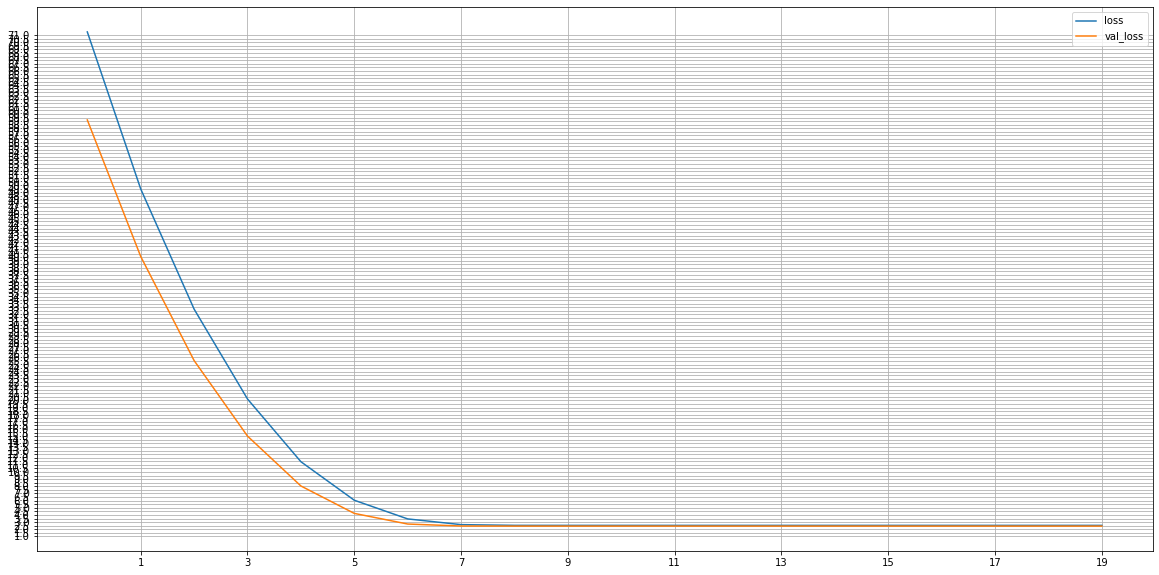

In [61]:
history_df = prp.p.DataFrame(model_dl_small.history.history)

plt.figure(figsize=(20,10))

plt.plot(history_df['loss'], label='loss')

plt.plot(history_df['val_loss'], label='val_loss')

plt.xticks(prp.np.arange(1,20+1,2))

plt.yticks(prp.np.arange(1,max(history_df['loss']),0.5))

plt.legend()

plt.grid()

In [62]:
y_pred = model_dl_small.predict(X_test)
y_pred = prp.np.exp(y_pred)

msle = prp.mean_squared_log_error(y_test, y_pred)
msle

121/121 [==============================] - 0s 633us/step


2.435958056787701